### Sales prediction means predicting how much of a product people will buy based on factor such as the amount you spend to advertise your product, the segment of people youadvertise for, or the platform you are advertising on about your product.Typically, a product and service-based business always need their Data Scientist to predict their future sales with every step they take to manipulate the cost of advertising their product. So let’s start the task of sales prediction with machine learning using Python.

In [11]:
pip install pandas scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [5]:
mydata=pd.read_csv("C:\\Users\\Bhuli\\Desktop\\Advertising.csv")

In [9]:
mydata.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [10]:
mydata.head(500)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [14]:
#Check column list present in df
mydata.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [17]:
#check descriptive statistics
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [18]:
#check the number of rows and columns present in df
print('rows---->',mydata.shape[0])
print('columns---->',mydata.shape[1])

rows----> 200
columns----> 5


In [19]:
#Lets see null value count in df
mydata.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [21]:
 mydata.isnull()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [23]:

mydata.columns=['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']
mydata.head(10)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [24]:
mydata.corr()

,Unnamed: 0,TV,Radio,Newspaper,Sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


In [31]:

#Find the missing values from each column
print(mydata.isnull().sum())

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64


In [32]:
#Find the total number of missing values from the entire dataset
mydata.isnull().sum().sum() 

0

In [1]:
# Providing the input and output data
# importing numpy library
import numpy as np

In [2]:
#the input data (x, regressor)
x = np.array(mydata[""]).reshape(-1,1)

NameError: name 'mydata' is not defined

C:\Users\Bhuli\AppData\Local\Temp\ipykernel_113512\1659973308.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  res = sn.distplot(mydata)


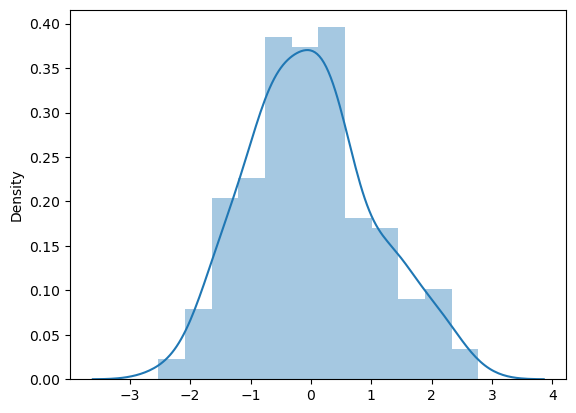

In [43]:
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

mydata = np.random.randn(200)
res = sn.distplot(mydata)
plt.show()

In [64]:
#load require liabraries of python
!pip install plotly
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [74]:

mydata.corr()

,col1,col2
col1,1.0,1.0
col2,1.0,1.0


<Axes: >

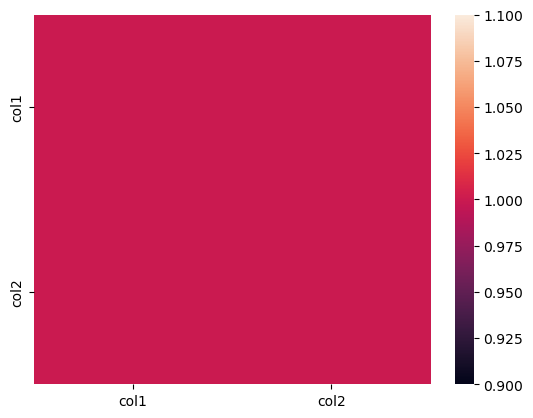

In [75]:
sns.heatmap(mydata.corr())

In [83]:
#loading the dataset
#import pandas library
import pandas as pd
#reading the data
mydata = pd.read_csv('C:\\Users\\Bhuli\\Desktop\\Advertising.csv')

In [84]:
mydata.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [86]:
# Providing the input and output data
# importing numpy library
import numpy as np

In [89]:
#the input data (x, regressor)
x = np.array(mydata["Unnamed: 0"]).reshape(-1,1)

In [90]:
x.shape

(200, 1)

In [91]:
print(x)

[[  1]
 [  2]
 [  3]
 [  4]
 [  5]
 [  6]
 [  7]
 [  8]
 [  9]
 [ 10]
 [ 11]
 [ 12]
 [ 13]
 [ 14]
 [ 15]
 [ 16]
 [ 17]
 [ 18]
 [ 19]
 [ 20]
 [ 21]
 [ 22]
 [ 23]
 [ 24]
 [ 25]
 [ 26]
 [ 27]
 [ 28]
 [ 29]
 [ 30]
 [ 31]
 [ 32]
 [ 33]
 [ 34]
 [ 35]
 [ 36]
 [ 37]
 [ 38]
 [ 39]
 [ 40]
 [ 41]
 [ 42]
 [ 43]
 [ 44]
 [ 45]
 [ 46]
 [ 47]
 [ 48]
 [ 49]
 [ 50]
 [ 51]
 [ 52]
 [ 53]
 [ 54]
 [ 55]
 [ 56]
 [ 57]
 [ 58]
 [ 59]
 [ 60]
 [ 61]
 [ 62]
 [ 63]
 [ 64]
 [ 65]
 [ 66]
 [ 67]
 [ 68]
 [ 69]
 [ 70]
 [ 71]
 [ 72]
 [ 73]
 [ 74]
 [ 75]
 [ 76]
 [ 77]
 [ 78]
 [ 79]
 [ 80]
 [ 81]
 [ 82]
 [ 83]
 [ 84]
 [ 85]
 [ 86]
 [ 87]
 [ 88]
 [ 89]
 [ 90]
 [ 91]
 [ 92]
 [ 93]
 [ 94]
 [ 95]
 [ 96]
 [ 97]
 [ 98]
 [ 99]
 [100]
 [101]
 [102]
 [103]
 [104]
 [105]
 [106]
 [107]
 [108]
 [109]
 [110]
 [111]
 [112]
 [113]
 [114]
 [115]
 [116]
 [117]
 [118]
 [119]
 [120]
 [121]
 [122]
 [123]
 [124]
 [125]
 [126]
 [127]
 [128]
 [129]
 [130]
 [131]
 [132]
 [133]
 [134]
 [135]
 [136]
 [137]
 [138]
 [139]
 [140]
 [141]
 [142]
 [143]

In [92]:
print(type(x))

<class 'numpy.ndarray'>


In [93]:
#the input data (x, regressor)
y = np.array(mydata["Sales"])

In [94]:
y.shape

(200,)

In [95]:
print(y)

[22.1 10.4  9.3 18.5 12.9  7.2 11.8 13.2  4.8 10.6  8.6 17.4  9.2  9.7
 19.  22.4 12.5 24.4 11.3 14.6 18.  12.5  5.6 15.5  9.7 12.  15.  15.9
 18.9 10.5 21.4 11.9  9.6 17.4  9.5 12.8 25.4 14.7 10.1 21.5 16.6 17.1
 20.7 12.9  8.5 14.9 10.6 23.2 14.8  9.7 11.4 10.7 22.6 21.2 20.2 23.7
  5.5 13.2 23.8 18.4  8.1 24.2 15.7 14.  18.   9.3  9.5 13.4 18.9 22.3
 18.3 12.4  8.8 11.  17.   8.7  6.9 14.2  5.3 11.  11.8 12.3 11.3 13.6
 21.7 15.2 12.  16.  12.9 16.7 11.2  7.3 19.4 22.2 11.5 16.9 11.7 15.5
 25.4 17.2 11.7 23.8 14.8 14.7 20.7 19.2  7.2  8.7  5.3 19.8 13.4 21.8
 14.1 15.9 14.6 12.6 12.2  9.4 15.9  6.6 15.5  7.  11.6 15.2 19.7 10.6
  6.6  8.8 24.7  9.7  1.6 12.7  5.7 19.6 10.8 11.6  9.5 20.8  9.6 20.7
 10.9 19.2 20.1 10.4 11.4 10.3 13.2 25.4 10.9 10.1 16.1 11.6 16.6 19.
 15.6  3.2 15.3 10.1  7.3 12.9 14.4 13.3 14.9 18.  11.9 11.9  8.  12.2
 17.1 15.   8.4 14.5  7.6 11.7 11.5 27.  20.2 11.7 11.8 12.6 10.5 12.2
  8.7 26.2 17.6 22.6 10.3 17.3 15.9  6.7 10.8  9.9  5.9 19.6 17.3  7.6
  9.7 1

In [96]:
#splitting the dataset
#import train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30)

In [97]:
#Eploring the train and testn datasets
x_train.shape

(140, 1)

In [98]:
x_test.shape

(60, 1)

In [99]:
y_train.shape

(140,)

In [100]:
y_test.shape

(60,)

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Assuming sales_data contains the cleaned and preprocessed dataset
X = mydata.drop('TV', axis=1)  # Features
y = mydata['Sales']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)


Mean Absolute Error: 1.4654943925052066e-15


In [122]:
from sklearn.metrics import r2_score
score = r2_score(mydata["TV"], mydata["Sales"])
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is -231.99999999999997%
